In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='urzog', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='urzog', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='urzog', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='urzog', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='goldz', pk='day', limits=(20,30))


# COMPARING ATTACKS BETWEEN RARITYS

In [3]:
df

,day,no_hero,usual,unusual,rare,epic
20,11.0,1.44,2.02,2.40,3.18,3.14
21,11.0,1.56,1.75,2.00,2.50,2.91
22,12.0,1.24,1.94,2.34,2.38,3.10
23,12.0,1.20,1.75,2.35,2.69,3.46
24,13.0,1.51,1.57,2.42,2.37,3.38
25,13.0,1.59,2.00,2.38,2.02,2.90
26,14.0,1.59,2.08,2.46,2.48,3.40
27,14.0,1.39,1.48,1.75,2.46,3.10
28,15.0,1.44,2.08,2.49,2.88,2.94
29,15.0,1.42,1.93,1.96,2.52,3.08


# TOTAL GOLDZ AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_sum

,no_hero,usual,unusual,rare,epic
0,14.38,18.6,22.55,25.48,31.41


Text(0.5, 1.0, 'Total Goldz After 5 Days')

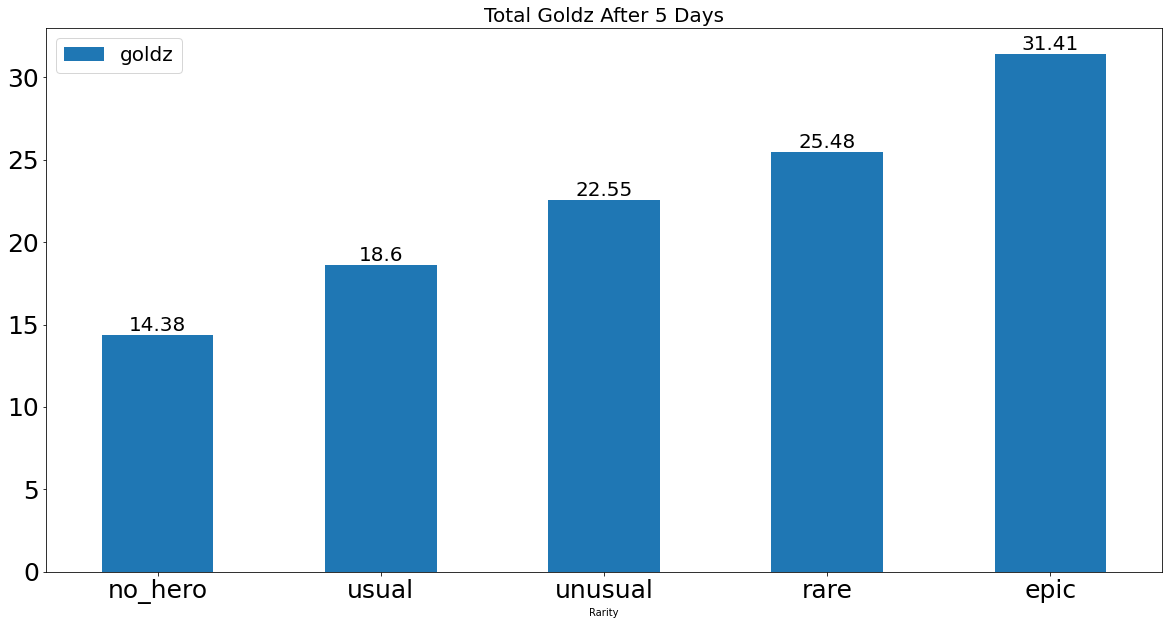

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Goldz After 5 Days", fontsize=20)

# GOLDZ AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_mean

,no_hero,usual,unusual,rare,epic
0,1.438,1.86,2.255,2.548,3.141


Text(0.5, 1.0, 'Goldz Average on Each attack')

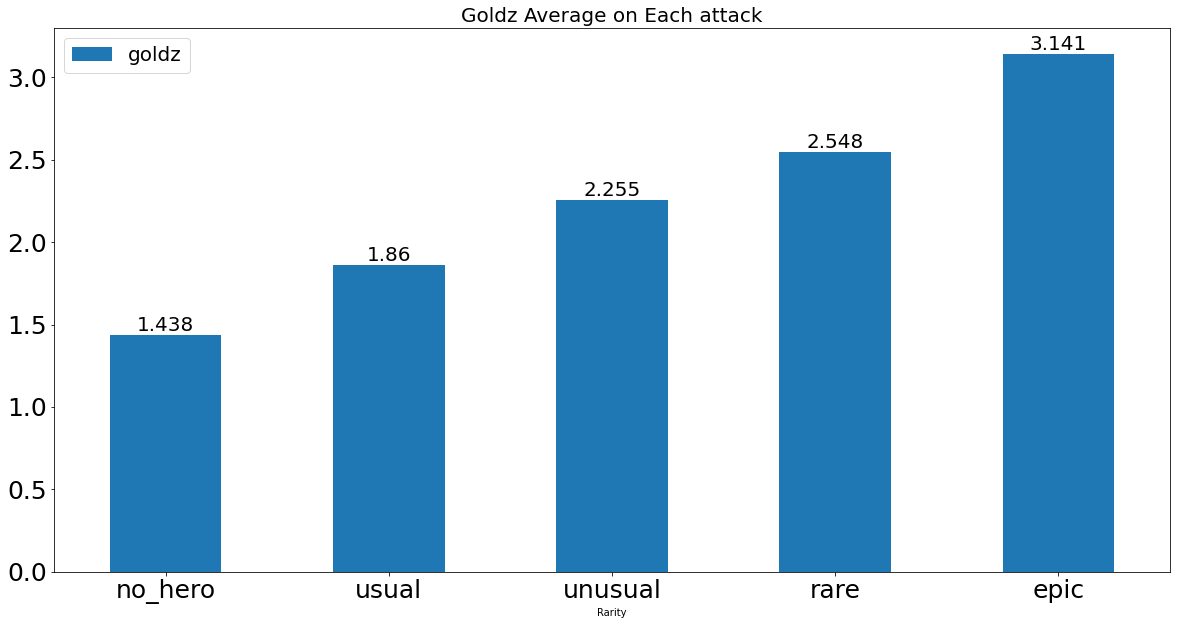

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'goldz':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Goldz Average on Each attack", fontsize=20)

# GOLDZ DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,usual,unusual,rare,epic
20,11.0,0.58,0.96,1.74,1.70
21,11.0,0.19,0.44,0.94,1.35
22,12.0,0.70,1.10,1.14,1.86
23,12.0,0.55,1.15,1.49,2.26
24,13.0,0.06,0.91,0.86,1.87
25,13.0,0.41,0.79,0.43,1.31
26,14.0,0.49,0.87,0.89,1.81
27,14.0,0.09,0.36,1.07,1.71
28,15.0,0.64,1.05,1.44,1.50
29,15.0,0.51,0.54,1.10,1.66


# TOTAL GOLDZ EARNED COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_sum

,usual,unusual,rare,epic
0,4.22,8.17,11.1,17.03


Text(0.5, 1.0, 'Total Diff Goldz After 5 Days Compared to No Hero')

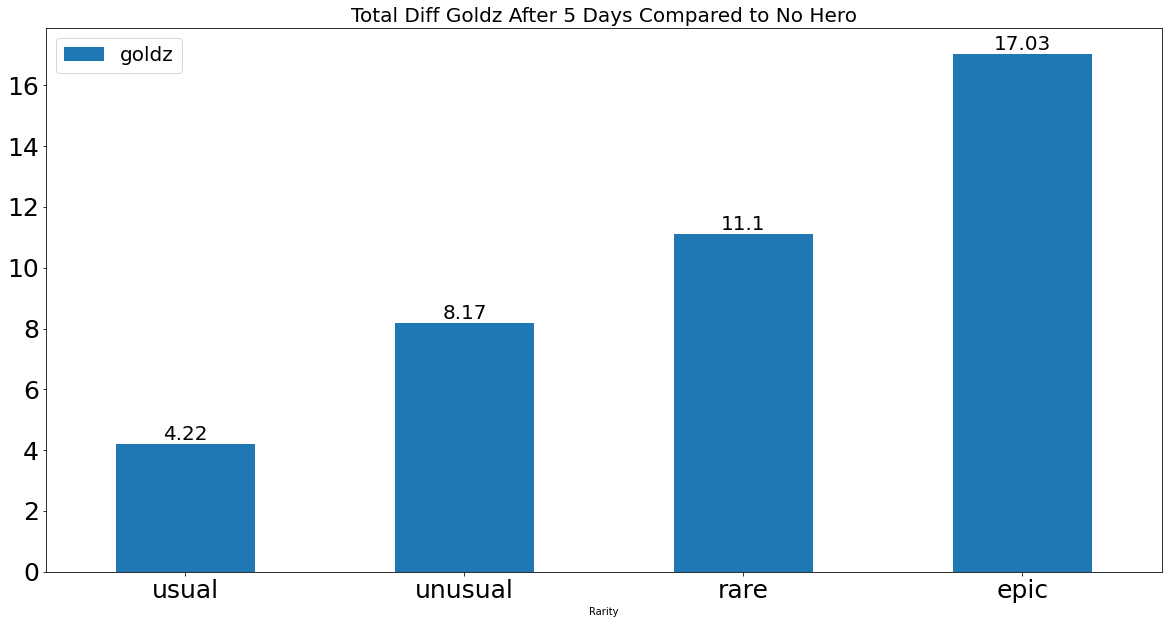

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'goldz':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Goldz After 5 Days Compared to No Hero", fontsize=20)

# GOLDZ DIFFERENCE EARNED PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_mean

,usual,unusual,rare,epic
0,0.422,0.817,1.11,1.703


Text(0.5, 1.0, 'Diff Goldz Average per Attack')

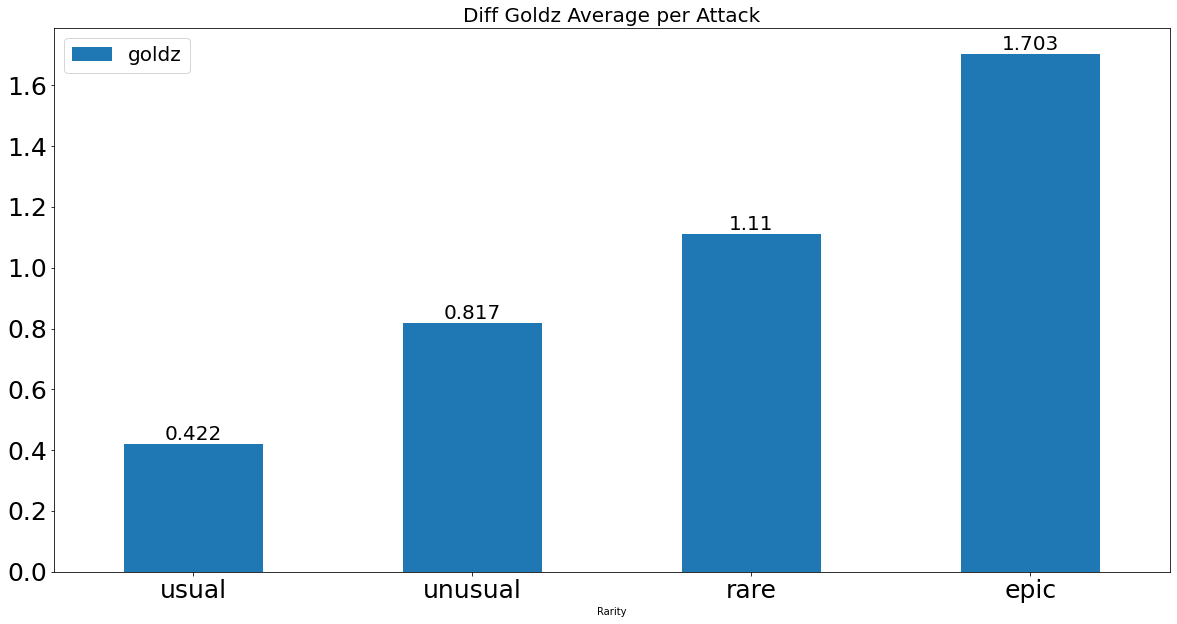

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'goldz':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')
# ax = df_diff_mean0.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Goldz Average per Attack", fontsize=20)